In [1]:
%load_ext lab_black

# Performance

Comparing the performance between `fasterq-dump` and `parallel-fastq-dump` either without or with compression.

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [3]:
raw = pd.read_table("info/trace.tsv", sep="\t")
raw

,task_id,hash,process,tag,name,status,exit,cpus,duration,%cpu,rss,peak_rss,read_bytes
0,3,86/a62fff,SRA_PREFETCH,ERR2815290,SRA_PREFETCH (ERR2815290),CACHED,0,1,11641,4.6,11288576,11288576,0
1,1,1c/a088a2,SRA_PREFETCH,ERR1017172,SRA_PREFETCH (ERR1017172),CACHED,0,1,41760,6.0,11264000,11264000,88260608
2,2,5c/fda0f5,SRA_PREFETCH,ERR1017173,SRA_PREFETCH (ERR1017173),CACHED,0,1,29464,6.6,11141120,11141120,6709248
3,6,27/55e927,SRA_PREFETCH,ERR2815291,SRA_PREFETCH (ERR2815291),CACHED,0,1,9580,6.8,11247616,11247616,0
4,8,2b/c9eba3,SRA_PREFETCH,ERR2815292,SRA_PREFETCH (ERR2815292),CACHED,0,1,7857,8.2,11235328,11235328,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,391,65/f8560a,PARALLEL_FASTQ_DUMP_COMPRESS,DRR000028,PARALLEL_FASTQ_DUMP_COMPRESS (DRR000028),COMPLETED,0,4,78468,361.8,216801280,221405184,35127296
391,392,5b/42f71e,PARALLEL_FASTQ_DUMP_COMPRESS,DRR000027,PARALLEL_FASTQ_DUMP_COMPRESS (DRR000027),COMPLETED,0,4,99663,373.7,210317312,214118400,48795648
392,393,d9/4740e8,PARALLEL_FASTQ_DUMP_COMPRESS,DRR000029,PARALLEL_FASTQ_DUMP_COMPRESS (DRR000029),COMPLETED,0,4,98754,369.9,205348864,208121856,48009216
393,394,62/a22ab9,PARALLEL_FASTQ_DUMP_COMPRESS,DRR000091,PARALLEL_FASTQ_DUMP_COMPRESS (DRR000091),COMPLETED,0,4,177627,389.0,222150656,223502336,59846656


In [4]:
raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   task_id     395 non-null    int64  
 1   hash        395 non-null    object 
 2   process     395 non-null    object 
 3   tag         395 non-null    object 
 4   name        395 non-null    object 
 5   status      395 non-null    object 
 6   exit        395 non-null    int64  
 7   cpus        395 non-null    int64  
 8   duration    395 non-null    int64  
 9   %cpu        395 non-null    float64
 10  rss         395 non-null    int64  
 11  peak_rss    395 non-null    int64  
 12  read_bytes  395 non-null    int64  
dtypes: float64(1), int64(7), object(5)
memory usage: 40.2+ KB


In [5]:
raw["process"].unique()

array(['SRA_PREFETCH', 'PARALLEL_FASTQ_DUMP_COMPRESS', 'SRA_DUMP',
       'SRA_DUMP_COMPRESS', 'PARALLEL_FASTQ_DUMP'], dtype=object)

In [6]:
df = (
    raw.loc[
        raw["process"] != "SRA_PREFETCH",
        ["process", "tag", "duration", "%cpu", "peak_rss"],
    ]
    .sort_values("tag")
    .groupby("process")
)

## Results Without Compression

In [7]:
plt.rcParams["figure.figsize"] = 16, 9

### CPU

4 threads/processes were made available to both tools.

/home/moritz/.pyenv/versions/3.8.10/envs/marvin/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/moritz/.pyenv/versions/3.8.10/envs/marvin/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


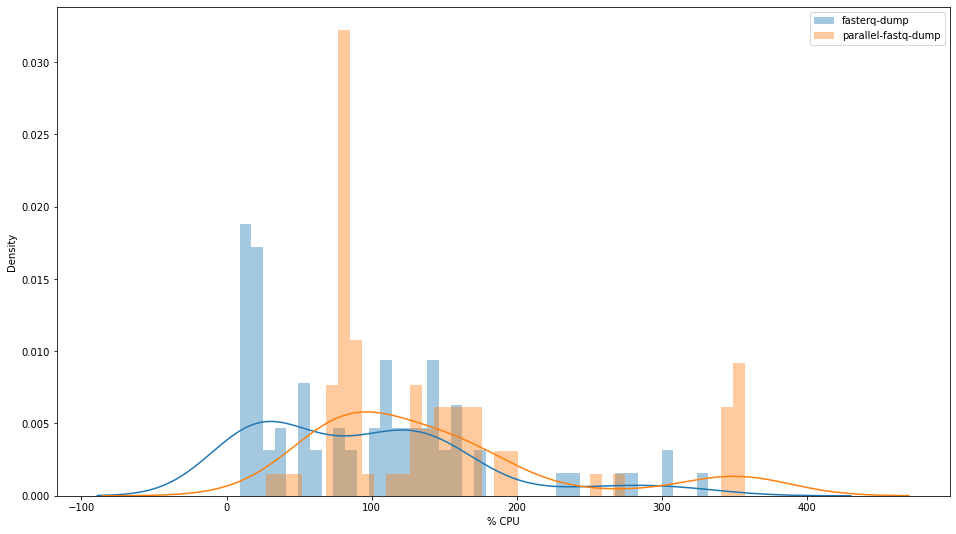

In [8]:
sns.distplot(
    df.get_group("SRA_DUMP")["%cpu"], bins=40, hist=True, kde=True, label="fasterq-dump"
)
sns.distplot(
    df.get_group("PARALLEL_FASTQ_DUMP")["%cpu"],
    bins=40,
    hist=True,
    kde=True,
    label="parallel-fastq-dump",
)
plt.xlabel("% CPU")
plt.ylabel("Density")
plt.legend(loc="upper right")
plt.savefig("figures/pcpu_density.png", dpi=300, facecolor="white", edgecolor="white")
plt.show()

### Peak Memory

/home/moritz/.pyenv/versions/3.8.10/envs/marvin/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/moritz/.pyenv/versions/3.8.10/envs/marvin/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


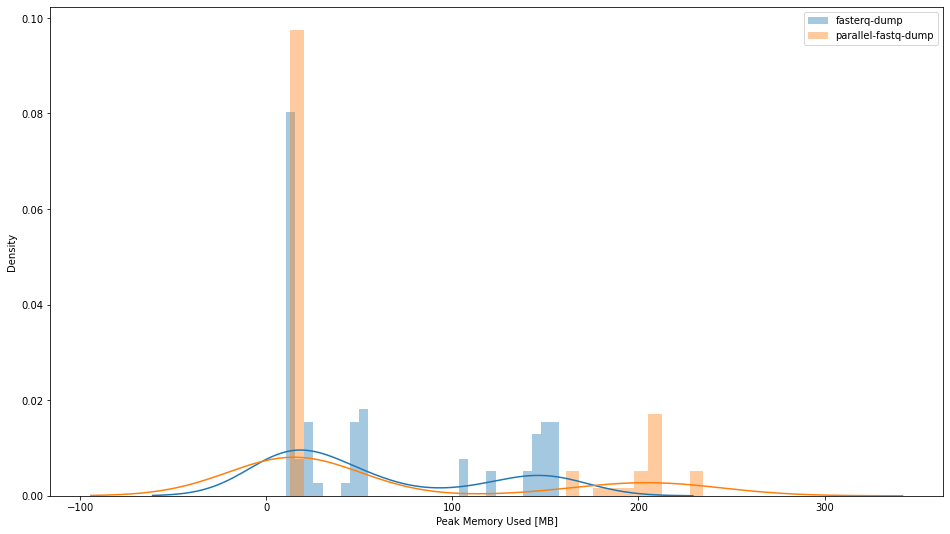

In [9]:
sns.distplot(
    df.get_group("SRA_DUMP")["peak_rss"] / (1024 ** 2),
    bins=30,
    hist=True,
    kde=True,
    label="fasterq-dump",
)
sns.distplot(
    df.get_group("PARALLEL_FASTQ_DUMP")["peak_rss"] / (1024 ** 2),
    bins=30,
    hist=True,
    kde=True,
    label="parallel-fastq-dump",
)
plt.xlabel("Peak Memory Used [MB]")
plt.ylabel("Density")
plt.legend(loc="upper right")
plt.savefig(
    "figures/peak_memory_density.png", dpi=300, facecolor="white", edgecolor="white"
)
plt.show()

### Duration

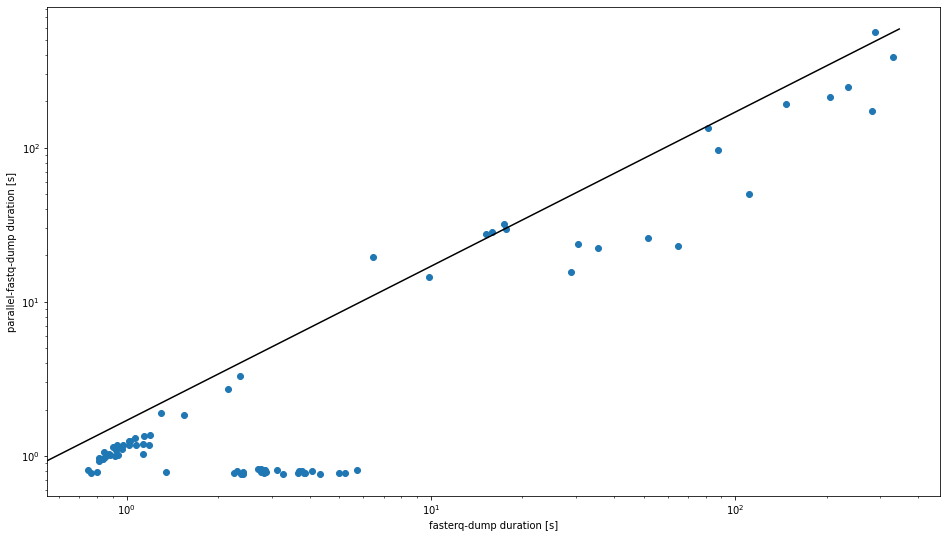

In [10]:
plt.scatter(
    df.get_group("SRA_DUMP")["duration"] / 1000,
    df.get_group("PARALLEL_FASTQ_DUMP")["duration"] / 1000,
)
plt.plot(plt.xlim(), plt.ylim(), color="black")
plt.loglog()
plt.xlabel("fasterq-dump duration [s]")
plt.ylabel("parallel-fastq-dump duration [s]")
plt.savefig("figures/duration.png", dpi=300, facecolor="white", edgecolor="white")
plt.show()

## Results With Compression

Compression is natively supported by `parallel-fastq-dump` via `fastq-dump`'s `--gzip` option. `fasterq-dump` does not offer the same so `pigz` with 4 processes was used. It was unclear which compression level is used by `fastq-dump` thus `pigz` was used with default compression.

### CPU

/home/moritz/.pyenv/versions/3.8.10/envs/marvin/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/moritz/.pyenv/versions/3.8.10/envs/marvin/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


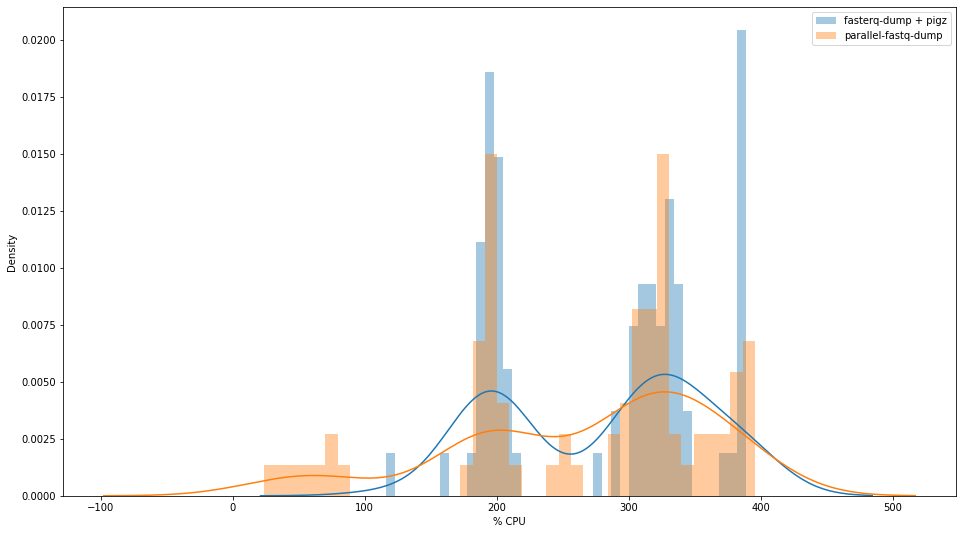

In [11]:
sns.distplot(
    df.get_group("SRA_DUMP_COMPRESS")["%cpu"],
    bins=40,
    hist=True,
    kde=True,
    label="fasterq-dump + pigz",
)
sns.distplot(
    df.get_group("PARALLEL_FASTQ_DUMP_COMPRESS")["%cpu"],
    bins=40,
    hist=True,
    kde=True,
    label="parallel-fastq-dump",
)
plt.xlabel("% CPU")
plt.ylabel("Density")
plt.legend(loc="upper right")
plt.savefig(
    "figures/pcpu_density_compressed.png", dpi=300, facecolor="white", edgecolor="white"
)
plt.show()

### Peak Memory

/home/moritz/.pyenv/versions/3.8.10/envs/marvin/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/moritz/.pyenv/versions/3.8.10/envs/marvin/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


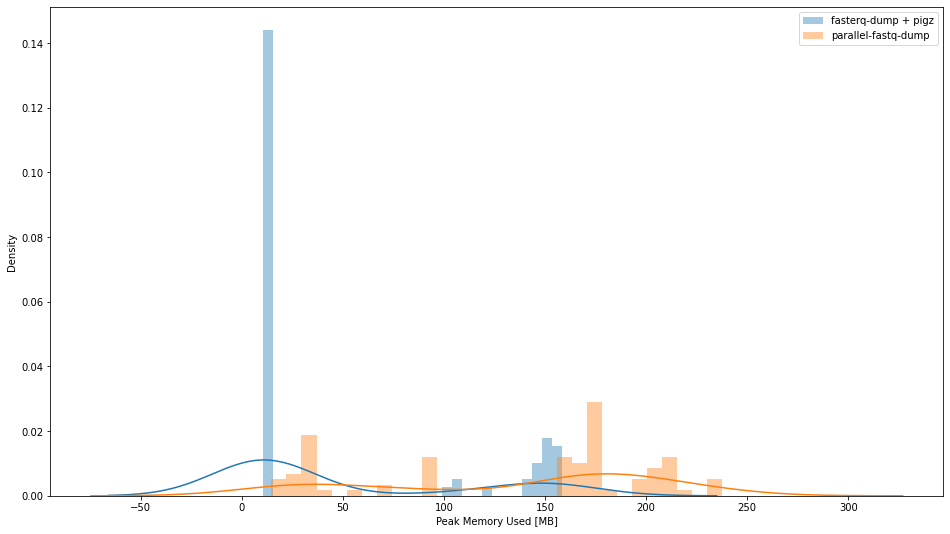

In [12]:
sns.distplot(
    df.get_group("SRA_DUMP_COMPRESS")["peak_rss"] / (1024 ** 2),
    bins=30,
    hist=True,
    kde=True,
    label="fasterq-dump + pigz",
)
sns.distplot(
    df.get_group("PARALLEL_FASTQ_DUMP_COMPRESS")["peak_rss"] / (1024 ** 2),
    bins=30,
    hist=True,
    kde=True,
    label="parallel-fastq-dump",
)
plt.xlabel("Peak Memory Used [MB]")
plt.ylabel("Density")
plt.legend(loc="upper right")
plt.savefig(
    "figures/peak_memory_density_compressed.png",
    dpi=300,
    facecolor="white",
    edgecolor="white",
)
plt.show()

### Duration

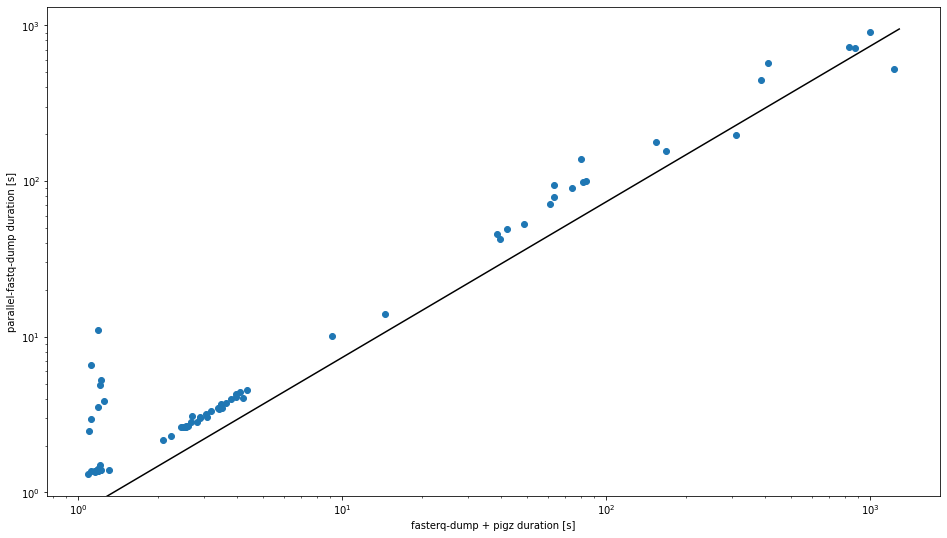

In [13]:
plt.scatter(
    df.get_group("SRA_DUMP_COMPRESS")["duration"] / 1000,
    df.get_group("PARALLEL_FASTQ_DUMP_COMPRESS")["duration"] / 1000,
)
plt.plot(plt.xlim(), plt.ylim(), color="black")
plt.loglog()
plt.xlabel("fasterq-dump + pigz duration [s]")
plt.ylabel("parallel-fastq-dump duration [s]")
plt.savefig(
    "figures/duration_compressed.png", dpi=300, facecolor="white", edgecolor="white"
)
plt.show()